# The Boston Housing Dataset
### Machine Learning and Statistics Assessment 2019
#### Due December 13th 2019
#### Simon McLain G00364775
### Introduction to the Boston Dataset
The Boston house-price was utilised by David Harrison Jr. and Daniel L. Rubinfeld in their paper "Hedonic Housing Prices and the Demand for Clean Air" published in the Journal of Environmental Economics and Management 5, pg. 82-102 in 1978. Their purpose was to derive an equation to express the willingness to pay more for housing if buyers or renters percieve improved air quality. The dataset containing 506 data points for 13 numeric/ categorical predictive attributes was used to identify price factors according to the premises internal and external characteristics affecting it. The fourteenth attritbute "Median Value" is the dependent variable, their hypothesis being that the numeric/ categorical attributes within the dataset could be used to predict the "Median Value" of housing. 

A link to their full article in provided in the references section along with blogs visited while conducting this assignment.  

The dataset, now commonly referred to the Boston Housing Dataset is often used machine learning blogs and papers to discuss regression analysis

![title](images\pic.jpg)
##### The image is released free of copyrights under Creative Commons CC0


## Import Libraries 

In [1]:
# Import libraries for analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from scipy import stats
import keras as kr
%matplotlib inline

# Hide warnings to improve readibility
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Load the Boston dataset

In [2]:
# Import Boston Housing dataset from SciKit Learn
from sklearn.datasets import load_boston
dataset = load_boston()

In [3]:
# discover the keys for the dataset
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Convert the dataset to a pandas dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [5]:
# Add a new column to the dataframe for Median Values of housing
df['MEDV'] = dataset.target

# Describe

In [6]:
# Description of the attributes of Boston Housing datase
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# Average Median Value of Housing
x = df.loc[:,"MEDV"].mean()
print("The Median Housing Value in thousands is: ", "$", round(x, 2))

The Median Housing Value in thousands is:  $ 22.53


In [8]:
print("Table 1. Full Descriptive Statistics")
df.describe().round(2)

Table 1. Full Descriptive Statistics


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


Plot 1


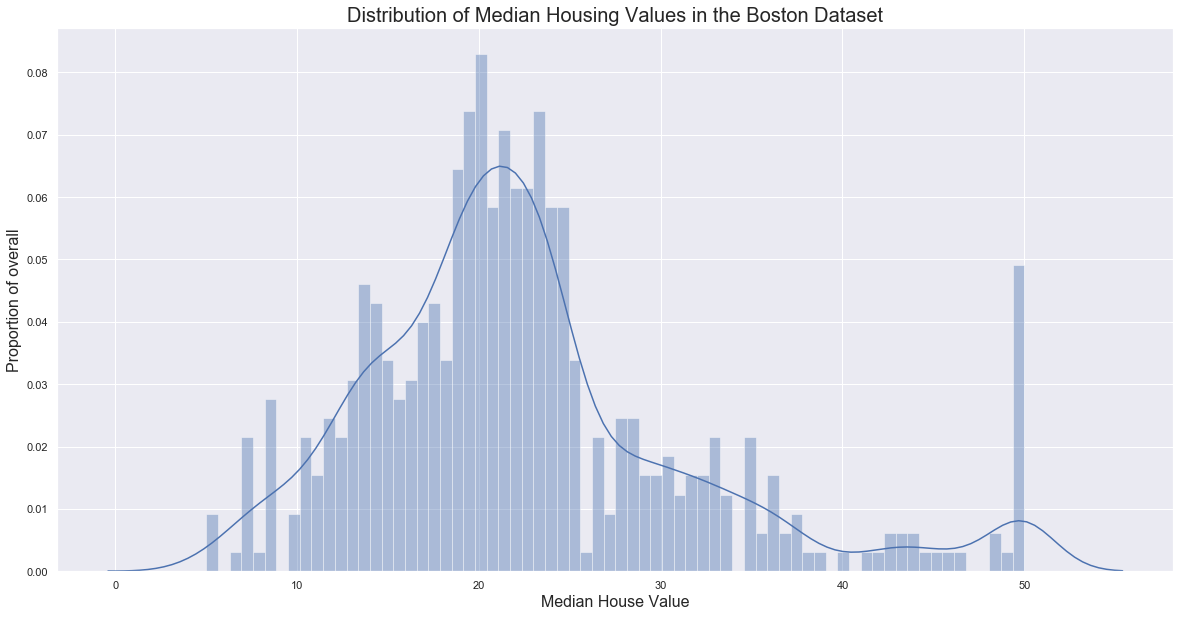

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
x = pd.Series(df['MEDV'])
ax = sns.distplot(x, bins=70, color='b', norm_hist=False, hist=True)
plt.title('Distribution of Median Housing Values in the Boston Dataset', fontsize=20)
plt.ylabel('Proportion of overall', fontsize=16)
plt.xlabel('Median House Value', fontsize=16)
print('Plot 1')

### Summary of Descriptive Statistics
The median housing value is $22,530. Overall, as displayed in Plot  the median values appear broadly to be normally distributed with a positive skew and some outliers at the higher end of values. 

# Infer

## Is there a significant difference in median house prices between houses along the Charles river and those that aren't?
![title](images\CHAS.jpg)

###### A watercolor illustration made for the Boston Esplanade Association.FRANK COSTANTINO
###### https://www.bostonglobe.com/arts/2012/03/04/make-better-esplanade-harness-citizens-passion/Z8hyWWzjJbJ9vCcvvyNaiM/story.html

### Summary
Several Statisical Analysis Techniques were used to determine the probablity of there being no significant difference between the median value of houses along the Charles river and those house that where not, (i.e. the null hypothesis). If the probablity that the two groups are samples from the same population is less than 0.05 then the null hypothesis can be rejected and the conclusion made that, based on the available observations, that there **is** a significant difference between the median value of houses. 

The conclusion using a variety of statistical techniques for cross-validation is that there is a statistical difference in median values for houses located on the Charles river and houses not located on the Charles river based on the observations within this dataset. 

Let's begin with some descriptive statistics. The plot below tells us that significantly fewer houses in the dataset are located along the Charles river, 35 versus 471. Houses not along the Charles river seem to follow a positively skewed normal distribution with a positive skew. The histogram in Plot 2 for houses along the Charles river is not very informative and should not be used to draw any conclusions.

Some deeper statistical analysis will be beneficial. 

#### Descriptive Statistics
It is clear that housing along the Charles river (MEDV_river in Table 2) have a higher mean value and a greater proportion of housing in the 3rd quartile than housing not along the Charles river (MEDV_no_river in Table 2). But this does not indicate that they two groups are not samples from the same overall population. 

In [10]:
# Slice CHAS column according to boolean values. 1 = along river, 0 = not along river
river_stats = df[df['CHAS']==1].describe()
river_stats.rename(columns=lambda x:x+'_river',inplace=True) 
no_river_stats = df[df['CHAS']==0].describe()
no_river_stats.rename(columns=lambda x:x+'_no_river',inplace=True) 
# create a new array containing 
statistics = pd.concat([river_stats, no_river_stats], axis=1)

In [11]:
desc = statistics.loc[:, ['MEDV_river', 'MEDV_no_river']]
print("Table 2. Descriptive statistics for MEDV according to CHAS showing differences between means of the groups")
desc

Table 2. Descriptive statistics for MEDV according to CHAS showing differences between means of the groups


,MEDV_river,MEDV_no_river
count,35.000000,471.000000
mean,28.440000,22.093843
std,11.816643,8.831362
min,13.400000,5.000000
25%,21.100000,16.600000
50%,23.300000,20.900000
75%,33.150000,24.800000
max,50.000000,50.000000


The histogram below, showing the distribtion of housing values in the two groups again shows they are centred around different means, however this still could simply be two samples from the same overall population.

Plot 2. Histograms showing the distribution of Median values of houses on the Charles river and not along the river


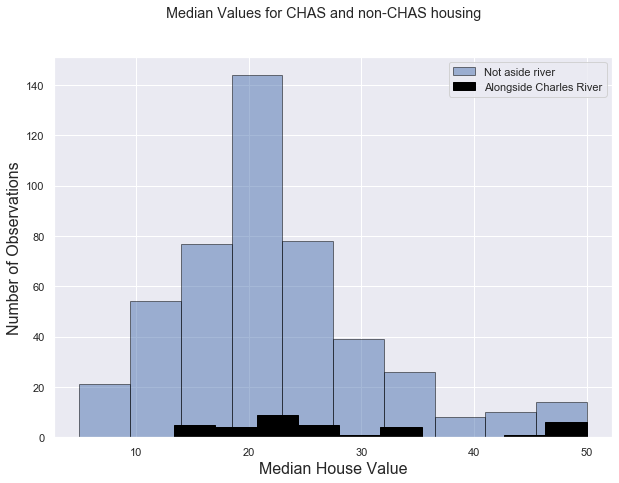

In [12]:
print('Plot 2. Histograms showing the distribution of Median values of houses on the Charles river and not along the river')
fig = plt.figure()
fig.suptitle('Median Values for CHAS and non-CHAS housing')
df[df['CHAS']==0].MEDV.plot(kind='hist',color='b',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['CHAS']==1].MEDV.plot(kind='hist',color='black',edgecolor='black', figsize=(10,7))
L = plt.legend()
L.get_texts()[0].set_text('Not aside river')
L.get_texts()[1].set_text('Alongside Charles River')
plt.ylabel('Number of Observations', fontsize=16)
plt.xlabel('Median House Value', fontsize=16)
plt.show()

Boxplots help us to visualise the distribution of Median housing values in the two samples. We can see that housing along the Charles river has a higher median value, as well as a greater spread or standard deviation from the mean value. Housing not along the Charles river has a small spread in values but a greater number of outliers. The boxplot is useful in visualising the data, however based solely on this data the Charles river housing could reasonably be argued to be within the range of outliers for houses not on the Charles river. 

Plot 3


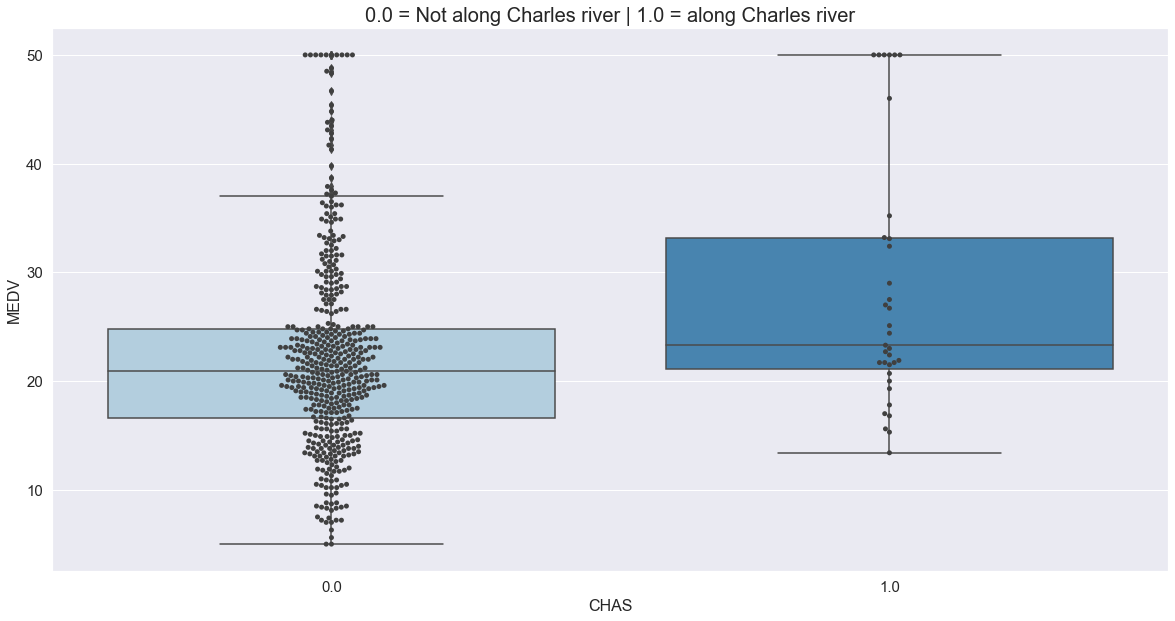

In [13]:
print('Plot 3')
ax = sns.boxplot(x="CHAS", y="MEDV", data=df, palette="Blues")
ax.axes.set_title("0.0 = Not along Charles river | 1.0 = along Charles river",fontsize=20)
ax.set_xlabel("CHAS",fontsize=16)
ax.set_ylabel("MEDV",fontsize=16)
ax.tick_params(labelsize=15)
ax = sns.swarmplot(x="CHAS", y="MEDV", data=df, color=".25")
plt.show()

#### t-test
The t-test compares the means of the Median Values for houses along the Charles river and those not along the Charles river to evaluate whether their means are statistically different from each other. Below an independent t-test is performed as both groups can be considered independent from each other. 

A pvalue of >0.05 allows us to reject the null hypothesis. According to the t-test the likelihood of both same being from within the same poplulation is 0.0036. The t-test assumes normally distributed samples, as we can see from the histogram in **Plot 3** both the groups have positive skew, with tail's and outliers extending to the right.

In [14]:
print('The pvalue below of >0.05 indicates that the two groups are not from the same sample')
stats.ttest_ind(df['MEDV'][df['CHAS']==1], df['MEDV'][df['CHAS']==0], equal_var=False)

The pvalue below of >0.05 indicates that the two groups are not from the same sample


Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

This low pvalue gives good evidence that houses alongside the Charles river are more valuable because they are alongside the Charles river

#### ANOVA
Analysis of Variance (ANOVA) is another inferential statistical technique we can use to analyse whether there is a significant difference median house prices between houses that are along the Charles river and those that are not. 

ANOVA looks at the variation between the groups, and the variation within groups. It is normally used to compare means among more than two-groups. We use it here as a second point of reference since there is strong overlap between the two groups of housing types. 

Again the significant level is >0.05, in fact it is considerably less by being a negative value. We can again conslude that there is a significant between the median housing value of the two groups and infer that houses along the Charles river are move valuable.

In [15]:
stats.f_oneway(df['MEDV'][df['CHAS']==1], df['MEDV'][df['CHAS']==0])

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

# Predict
![title](images\predict.jpg)
##### Ms Marvel (Carol Danvers) the Boston based Superhero with pre-cognative "seventh sense" powers. Perhaps she can make some predictions about housing in Boston too
##### Copyright https://www.marvel.com/characters/captain-marvel-carol-danvers/in-comics 

### Summary and conclusions
At face value or rather as displayed in Plot 4. The neural network appears to make reasonably accurate predictions. With the blue predictive triangles covering the actual values in most cases. Plot 5 also indicate the data has very similar means and a very similar shape. 

The main factor to consider is the acceptable level of accuracy for the predictions.

The standard deviation, that is the average error of the prediction is USD310.00. Meaning that on average the neural network undervalues the median housing value by USD310.00 (see descriptive statistics in last cell). As a seller of houses I would not be overly satisfied with this prediction as it would in effect mean leaving money on the table. Conversely as a buyer I would be happy with this model as it potentially gives a bargin, on average.

In practice with this model there is a risk of overvaluing property for the lowest income earners. The lower 25% quartile of below USD17000.00 are on average overvalued by USD110. Penalising the lowest income groups who typically purchase lower value properties. Thereas the top 75% quartile of Median housing values tends to be undervalued by USD270.00 on average. 

The interquartile range tends to be undervalued by USD340.00, that is the majority of purchasers would benefit and sellers be penalised by this model. Some lucky person could underpay the median housing value by USD1490.00 and a unluckly person overpay by USD1260.00. 

In conclusion this is not a 'socially-just' model to apply in the real world, further work could be carried out to improve the accuracy of the model.

Note: actual values above may vary each time the network is run, however orders of magnitude will be similar

In [40]:
# Display the head of the datafrome
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# Import Libraries for preprocessing
import sklearn.preprocessing as pre

In [18]:
# Create a dataframe for pre-processing containing the independent variables 
x = df.iloc[:, 0:13]
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
# Create a dataframe containing the dependent variable (median housing value) as the target for the neural network
target = df.iloc[:, 13:14]
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### Fitting and Transforming

In [20]:
# Kera prefers values that are centred around zero, scale the datafrome and return as a numpy array
scaler = pre.StandardScaler()
scaler.fit(x)
scaler.mean_, scaler.scale_

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00]))

In [21]:
# Convert the numpy array to a pandas dataframe
xscale = pd.DataFrame(scaler.transform(x), columns=x.columns)
xscale.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [22]:
# create a correlation matrix that will help identify multi-colinearity. Attributes that strongly correlate with eachother
x.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


#### Whiting

In [23]:
# Import the library for whitening the independent variables
import sklearn.decomposition as dec

In [24]:
# Whitening the datafrome helps to neutralised the effect of multi-colinearity on the neural network. 
# If whitening was not performed the output of the neural network would be biased by attributes that correlate with 
# eachother dampening any influence they have on the dependent variable
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x)
xwhite = pd.DataFrame(pca.transform(x), columns=x.columns)
xwhite.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.681737,-0.070328,-0.110906,0.324032,-0.257641,-1.195502,-0.257642,1.774739,-1.069788,-0.302890,0.749064,-0.290887,0.606963
1,-0.960939,0.127958,-1.076024,0.079408,0.052369,-0.613999,-0.156852,0.296642,0.258499,1.196095,0.096360,-0.386434,-0.599819
2,-0.963338,0.178102,-0.585647,-0.629399,-0.013232,-1.119363,0.428840,0.165237,0.229360,0.837983,-0.925444,-0.437518,-0.081586
3,-1.082361,0.231504,-0.228412,-1.202960,0.214394,-1.318206,-0.491872,0.274068,0.587810,0.887470,-0.546818,-0.214018,0.790989
4,-1.081808,0.203619,-0.459975,-0.868201,0.249464,-1.091127,-0.763402,0.334618,0.587477,1.033557,-1.065225,-0.225982,0.643021


In [25]:
# Display the whitening of the independent variables to check there correlations are close to Zero (rounded) 
xwhite.corr().round()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
ZN,0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
INDUS,0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
CHAS,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
NOX,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
RM,-0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
AGE,0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
DIS,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0
RAD,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0
TAX,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0


In [26]:
# Import libraries for the neural network
from keras import Sequential
from keras.layers import Dense
from keras import metrics
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot
import pydot

# Build our model and add layers to the neural network
m = kr.models.Sequential()
# Add the layers and adjust to optimise the network
m.add(kr.layers.Dense(30, input_dim=13, activation='relu'))
m.add(kr.layers.Dense(25, activation='tanh'))
m.add(kr.layers.Dense(20, activation='sigmoid'))
m.add(kr.layers.Dense(15, activation='sigmoid'))
m.add(kr.layers.Dense(10, activation='linear'))
m.add(kr.layers.Dense(5, activation='linear'))
m.add(kr.layers.Dense(1, activation='linear'))

m.compile(loss='mean_squared_error', optimizer='adam', metrics=[metrics.mae, metrics.categorical_accuracy])

In [27]:
# Create x and y values for the neural network
x = xwhite
y = target

In [28]:
# Train the neural network
m.fit(x, y,epochs=1000, batch_size=10)

Epoch 1/1000
506/506 [==============================] - 1s 2ms/step - loss: 445.8576 - mean_absolute_error: 18.9606 - categorical_accuracy: 1.0000
Epoch 2/1000
506/506 [==============================] - 0s 142us/step - loss: 231.6895 - mean_absolute_error: 12.2039 - categorical_accuracy: 1.0000
Epoch 3/1000
506/506 [==============================] - 0s 160us/step - loss: 98.6279 - mean_absolute_error: 7.0132 - categorical_accuracy: 1.0000
Epoch 4/1000
506/506 [==============================] - 0s 166us/step - loss: 83.6040 - mean_absolute_error: 6.6441 - categorical_accuracy: 1.0000
Epoch 5/1000
506/506 [==============================] - 0s 160us/step - loss: 81.1283 - mean_absolute_error: 6.4359 - categorical_accuracy: 1.0000
Epoch 6/1000
506/506 [==============================] - 0s 171us/step - loss: 64.3757 - mean_absolute_error: 5.5188 - categorical_accuracy: 1.0000
Epoch 7/1000
506/506 [==============================] - 0s 171us/step - loss: 47.7683 - mean_absolute_error: 4.7887 

506/506 [==============================] - 0s 154us/step - loss: 2.6951 - mean_absolute_error: 1.1895 - categorical_accuracy: 1.0000
Epoch 57/1000
506/506 [==============================] - 0s 181us/step - loss: 2.6248 - mean_absolute_error: 1.1614 - categorical_accuracy: 1.0000
Epoch 58/1000
506/506 [==============================] - 0s 193us/step - loss: 2.7075 - mean_absolute_error: 1.2125 - categorical_accuracy: 1.0000
Epoch 59/1000
506/506 [==============================] - 0s 160us/step - loss: 2.6104 - mean_absolute_error: 1.1947 - categorical_accuracy: 1.0000
Epoch 60/1000
506/506 [==============================] - 0s 146us/step - loss: 2.5280 - mean_absolute_error: 1.1436 - categorical_accuracy: 1.0000
Epoch 61/1000
506/506 [==============================] - 0s 134us/step - loss: 2.5546 - mean_absolute_error: 1.1491 - categorical_accuracy: 1.0000
Epoch 62/1000
506/506 [==============================] - 0s 160us/step - loss: 2.4919 - mean_absolute_error: 1.1462 - categorical_ac

506/506 [==============================] - 0s 170us/step - loss: 1.6057 - mean_absolute_error: 0.9189 - categorical_accuracy: 1.0000
Epoch 112/1000
506/506 [==============================] - 0s 160us/step - loss: 1.6468 - mean_absolute_error: 0.9335 - categorical_accuracy: 1.0000
Epoch 113/1000
506/506 [==============================] - 0s 173us/step - loss: 1.5873 - mean_absolute_error: 0.8983 - categorical_accuracy: 1.0000
Epoch 114/1000
506/506 [==============================] - 0s 166us/step - loss: 1.6453 - mean_absolute_error: 0.9432 - categorical_accuracy: 1.0000
Epoch 115/1000
506/506 [==============================] - 0s 158us/step - loss: 1.5716 - mean_absolute_error: 0.9039 - categorical_accuracy: 1.0000
Epoch 116/1000
506/506 [==============================] - 0s 132us/step - loss: 1.6047 - mean_absolute_error: 0.9123 - categorical_accuracy: 1.0000
Epoch 117/1000
506/506 [==============================] - 0s 134us/step - loss: 1.5629 - mean_absolute_error: 0.9157 - categori

506/506 [==============================] - 0s 162us/step - loss: 1.2125 - mean_absolute_error: 0.7721 - categorical_accuracy: 1.0000
Epoch 167/1000
506/506 [==============================] - 0s 138us/step - loss: 1.2584 - mean_absolute_error: 0.7836 - categorical_accuracy: 1.0000
Epoch 168/1000
506/506 [==============================] - 0s 142us/step - loss: 1.2616 - mean_absolute_error: 0.7932 - categorical_accuracy: 1.0000
Epoch 169/1000
506/506 [==============================] - 0s 162us/step - loss: 1.2472 - mean_absolute_error: 0.7790 - categorical_accuracy: 1.0000
Epoch 170/1000
506/506 [==============================] - 0s 160us/step - loss: 1.2147 - mean_absolute_error: 0.7750 - categorical_accuracy: 1.0000
Epoch 171/1000
506/506 [==============================] - 0s 150us/step - loss: 1.2565 - mean_absolute_error: 0.7986 - categorical_accuracy: 1.0000
Epoch 172/1000
506/506 [==============================] - 0s 144us/step - loss: 1.2909 - mean_absolute_error: 0.8099 - categori

506/506 [==============================] - 0s 158us/step - loss: 1.0464 - mean_absolute_error: 0.7310 - categorical_accuracy: 1.0000
Epoch 222/1000
506/506 [==============================] - 0s 162us/step - loss: 1.1582 - mean_absolute_error: 0.7708 - categorical_accuracy: 1.0000
Epoch 223/1000
506/506 [==============================] - 0s 144us/step - loss: 1.0064 - mean_absolute_error: 0.6990 - categorical_accuracy: 1.0000
Epoch 224/1000
506/506 [==============================] - 0s 140us/step - loss: 0.9566 - mean_absolute_error: 0.6730 - categorical_accuracy: 1.0000
Epoch 225/1000
506/506 [==============================] - 0s 138us/step - loss: 0.9554 - mean_absolute_error: 0.6698 - categorical_accuracy: 1.0000
Epoch 226/1000
506/506 [==============================] - 0s 134us/step - loss: 1.0182 - mean_absolute_error: 0.7061 - categorical_accuracy: 1.0000
Epoch 227/1000
506/506 [==============================] - 0s 134us/step - loss: 1.0150 - mean_absolute_error: 0.7198 - categori

506/506 [==============================] - 0s 156us/step - loss: 0.8250 - mean_absolute_error: 0.6174 - categorical_accuracy: 1.0000
Epoch 277/1000
506/506 [==============================] - 0s 162us/step - loss: 0.8485 - mean_absolute_error: 0.6547 - categorical_accuracy: 1.0000
Epoch 278/1000
506/506 [==============================] - 0s 140us/step - loss: 0.8399 - mean_absolute_error: 0.6516 - categorical_accuracy: 1.0000
Epoch 279/1000
506/506 [==============================] - 0s 140us/step - loss: 0.7810 - mean_absolute_error: 0.5883 - categorical_accuracy: 1.0000
Epoch 280/1000
506/506 [==============================] - 0s 130us/step - loss: 0.7982 - mean_absolute_error: 0.6100 - categorical_accuracy: 1.0000
Epoch 281/1000
506/506 [==============================] - 0s 140us/step - loss: 0.8180 - mean_absolute_error: 0.6389 - categorical_accuracy: 1.0000
Epoch 282/1000
506/506 [==============================] - 0s 138us/step - loss: 0.8818 - mean_absolute_error: 0.6678 - categori

506/506 [==============================] - 0s 154us/step - loss: 0.6970 - mean_absolute_error: 0.5675 - categorical_accuracy: 1.0000
Epoch 332/1000
506/506 [==============================] - 0s 148us/step - loss: 0.7211 - mean_absolute_error: 0.6041 - categorical_accuracy: 1.0000
Epoch 333/1000
506/506 [==============================] - 0s 152us/step - loss: 0.6628 - mean_absolute_error: 0.5578 - categorical_accuracy: 1.0000
Epoch 334/1000
506/506 [==============================] - 0s 152us/step - loss: 0.6281 - mean_absolute_error: 0.5388 - categorical_accuracy: 1.0000
Epoch 335/1000
506/506 [==============================] - 0s 148us/step - loss: 0.5946 - mean_absolute_error: 0.5286 - categorical_accuracy: 1.0000
Epoch 336/1000
506/506 [==============================] - 0s 146us/step - loss: 0.7043 - mean_absolute_error: 0.5997 - categorical_accuracy: 1.0000
Epoch 337/1000
506/506 [==============================] - 0s 152us/step - loss: 0.6439 - mean_absolute_error: 0.5550 - categori

506/506 [==============================] - 0s 156us/step - loss: 0.5079 - mean_absolute_error: 0.4971 - categorical_accuracy: 1.0000
Epoch 386/1000
506/506 [==============================] - 0s 154us/step - loss: 0.6026 - mean_absolute_error: 0.5488 - categorical_accuracy: 1.0000
Epoch 387/1000
506/506 [==============================] - 0s 164us/step - loss: 0.5148 - mean_absolute_error: 0.4887 - categorical_accuracy: 1.0000
Epoch 388/1000
506/506 [==============================] - 0s 152us/step - loss: 0.5004 - mean_absolute_error: 0.4889 - categorical_accuracy: 1.0000
Epoch 389/1000
506/506 [==============================] - 0s 146us/step - loss: 0.6136 - mean_absolute_error: 0.5621 - categorical_accuracy: 1.0000
Epoch 390/1000
506/506 [==============================] - 0s 148us/step - loss: 0.7000 - mean_absolute_error: 0.6119 - categorical_accuracy: 1.0000
Epoch 391/1000
506/506 [==============================] - 0s 152us/step - loss: 0.6233 - mean_absolute_error: 0.5563 - categori

506/506 [==============================] - 0s 148us/step - loss: 0.4271 - mean_absolute_error: 0.4580 - categorical_accuracy: 1.0000
Epoch 441/1000
506/506 [==============================] - 0s 150us/step - loss: 0.3853 - mean_absolute_error: 0.4216 - categorical_accuracy: 1.0000
Epoch 442/1000
506/506 [==============================] - 0s 150us/step - loss: 0.3908 - mean_absolute_error: 0.4280 - categorical_accuracy: 1.0000
Epoch 443/1000
506/506 [==============================] - 0s 148us/step - loss: 0.3791 - mean_absolute_error: 0.4208 - categorical_accuracy: 1.0000
Epoch 444/1000
506/506 [==============================] - 0s 158us/step - loss: 0.4170 - mean_absolute_error: 0.4572 - categorical_accuracy: 1.0000
Epoch 445/1000
506/506 [==============================] - 0s 179us/step - loss: 0.4209 - mean_absolute_error: 0.4575 - categorical_accuracy: 1.0000
Epoch 446/1000
506/506 [==============================] - 0s 152us/step - loss: 0.4447 - mean_absolute_error: 0.4740 - categori

506/506 [==============================] - 0s 158us/step - loss: 0.3710 - mean_absolute_error: 0.4179 - categorical_accuracy: 1.0000
Epoch 495/1000
506/506 [==============================] - 0s 152us/step - loss: 0.3727 - mean_absolute_error: 0.4473 - categorical_accuracy: 1.0000
Epoch 496/1000
506/506 [==============================] - 0s 150us/step - loss: 0.3363 - mean_absolute_error: 0.4061 - categorical_accuracy: 1.0000
Epoch 497/1000
506/506 [==============================] - 0s 152us/step - loss: 0.3151 - mean_absolute_error: 0.3889 - categorical_accuracy: 1.0000
Epoch 498/1000
506/506 [==============================] - 0s 148us/step - loss: 0.2843 - mean_absolute_error: 0.3670 - categorical_accuracy: 1.0000
Epoch 499/1000
506/506 [==============================] - 0s 152us/step - loss: 0.3590 - mean_absolute_error: 0.4461 - categorical_accuracy: 1.0000
Epoch 500/1000
506/506 [==============================] - 0s 150us/step - loss: 0.3651 - mean_absolute_error: 0.4400 - categori

506/506 [==============================] - 0s 189us/step - loss: 0.2390 - mean_absolute_error: 0.3449 - categorical_accuracy: 1.0000
Epoch 550/1000
506/506 [==============================] - 0s 164us/step - loss: 0.2380 - mean_absolute_error: 0.3413 - categorical_accuracy: 1.0000
Epoch 551/1000
506/506 [==============================] - 0s 154us/step - loss: 0.2794 - mean_absolute_error: 0.3922 - categorical_accuracy: 1.0000
Epoch 552/1000
506/506 [==============================] - 0s 148us/step - loss: 0.2812 - mean_absolute_error: 0.3915 - categorical_accuracy: 1.0000
Epoch 553/1000
506/506 [==============================] - 0s 156us/step - loss: 0.2586 - mean_absolute_error: 0.3532 - categorical_accuracy: 1.0000
Epoch 554/1000
506/506 [==============================] - 0s 150us/step - loss: 0.2608 - mean_absolute_error: 0.3685 - categorical_accuracy: 1.0000
Epoch 555/1000
506/506 [==============================] - 0s 154us/step - loss: 0.2274 - mean_absolute_error: 0.3350 - categori

506/506 [==============================] - 0s 177us/step - loss: 0.1893 - mean_absolute_error: 0.3024 - categorical_accuracy: 1.0000
Epoch 605/1000
506/506 [==============================] - 0s 171us/step - loss: 0.1844 - mean_absolute_error: 0.3059 - categorical_accuracy: 1.0000
Epoch 606/1000
506/506 [==============================] - 0s 154us/step - loss: 0.2120 - mean_absolute_error: 0.3417 - categorical_accuracy: 1.0000
Epoch 607/1000
506/506 [==============================] - 0s 170us/step - loss: 0.2541 - mean_absolute_error: 0.3651 - categorical_accuracy: 1.0000
Epoch 608/1000
506/506 [==============================] - 0s 170us/step - loss: 0.2751 - mean_absolute_error: 0.3675 - categorical_accuracy: 1.0000
Epoch 609/1000
506/506 [==============================] - 0s 136us/step - loss: 0.3153 - mean_absolute_error: 0.4130 - categorical_accuracy: 1.0000
Epoch 610/1000
506/506 [==============================] - 0s 138us/step - loss: 0.2765 - mean_absolute_error: 0.3845 - categori

506/506 [==============================] - 0s 154us/step - loss: 0.1551 - mean_absolute_error: 0.2825 - categorical_accuracy: 1.0000
Epoch 660/1000
506/506 [==============================] - 0s 156us/step - loss: 0.1799 - mean_absolute_error: 0.3136 - categorical_accuracy: 1.0000
Epoch 661/1000
506/506 [==============================] - 0s 148us/step - loss: 0.1712 - mean_absolute_error: 0.2979 - categorical_accuracy: 1.0000
Epoch 662/1000
506/506 [==============================] - 0s 152us/step - loss: 0.1553 - mean_absolute_error: 0.2792 - categorical_accuracy: 1.0000
Epoch 663/1000
506/506 [==============================] - 0s 148us/step - loss: 0.1744 - mean_absolute_error: 0.3037 - categorical_accuracy: 1.0000
Epoch 664/1000
506/506 [==============================] - 0s 154us/step - loss: 0.2428 - mean_absolute_error: 0.3797 - categorical_accuracy: 1.0000
Epoch 665/1000
506/506 [==============================] - 0s 146us/step - loss: 0.5238 - mean_absolute_error: 0.5549 - categori

506/506 [==============================] - 0s 158us/step - loss: 0.2217 - mean_absolute_error: 0.3628 - categorical_accuracy: 1.0000
Epoch 715/1000
506/506 [==============================] - 0s 146us/step - loss: 0.1578 - mean_absolute_error: 0.2925 - categorical_accuracy: 1.0000
Epoch 716/1000
506/506 [==============================] - 0s 150us/step - loss: 0.1515 - mean_absolute_error: 0.2864 - categorical_accuracy: 1.0000
Epoch 717/1000
506/506 [==============================] - 0s 154us/step - loss: 0.1752 - mean_absolute_error: 0.3040 - categorical_accuracy: 1.0000
Epoch 718/1000
506/506 [==============================] - 0s 150us/step - loss: 0.1293 - mean_absolute_error: 0.2647 - categorical_accuracy: 1.0000
Epoch 719/1000
506/506 [==============================] - 0s 148us/step - loss: 0.1343 - mean_absolute_error: 0.2550 - categorical_accuracy: 1.0000
Epoch 720/1000
506/506 [==============================] - 0s 152us/step - loss: 0.1413 - mean_absolute_error: 0.2741 - categori

506/506 [==============================] - 0s 152us/step - loss: 0.1471 - mean_absolute_error: 0.2707 - categorical_accuracy: 1.0000
Epoch 770/1000
506/506 [==============================] - 0s 152us/step - loss: 0.1357 - mean_absolute_error: 0.2696 - categorical_accuracy: 1.0000
Epoch 771/1000
506/506 [==============================] - 0s 154us/step - loss: 0.1344 - mean_absolute_error: 0.2705 - categorical_accuracy: 1.0000
Epoch 772/1000
506/506 [==============================] - 0s 152us/step - loss: 0.1432 - mean_absolute_error: 0.2752 - categorical_accuracy: 1.0000
Epoch 773/1000
506/506 [==============================] - 0s 158us/step - loss: 0.2258 - mean_absolute_error: 0.3433 - categorical_accuracy: 1.0000
Epoch 774/1000
506/506 [==============================] - 0s 148us/step - loss: 0.1997 - mean_absolute_error: 0.3386 - categorical_accuracy: 1.0000
Epoch 775/1000
506/506 [==============================] - 0s 181us/step - loss: 0.2004 - mean_absolute_error: 0.3318 - categori

506/506 [==============================] - 0s 152us/step - loss: 0.1284 - mean_absolute_error: 0.2634 - categorical_accuracy: 1.0000
Epoch 825/1000
506/506 [==============================] - 0s 152us/step - loss: 0.1298 - mean_absolute_error: 0.2624 - categorical_accuracy: 1.0000
Epoch 826/1000
506/506 [==============================] - 0s 150us/step - loss: 0.1228 - mean_absolute_error: 0.2550 - categorical_accuracy: 1.0000
Epoch 827/1000
506/506 [==============================] - 0s 152us/step - loss: 0.1730 - mean_absolute_error: 0.3181 - categorical_accuracy: 1.0000
Epoch 828/1000
506/506 [==============================] - 0s 148us/step - loss: 0.1547 - mean_absolute_error: 0.2982 - categorical_accuracy: 1.0000
Epoch 829/1000
506/506 [==============================] - 0s 152us/step - loss: 0.1300 - mean_absolute_error: 0.2703 - categorical_accuracy: 1.0000
Epoch 830/1000
506/506 [==============================] - 0s 160us/step - loss: 0.1102 - mean_absolute_error: 0.2449 - categori

506/506 [==============================] - 0s 152us/step - loss: 0.1380 - mean_absolute_error: 0.2781 - categorical_accuracy: 1.0000
Epoch 880/1000
506/506 [==============================] - 0s 154us/step - loss: 0.1150 - mean_absolute_error: 0.2408 - categorical_accuracy: 1.0000
Epoch 881/1000
506/506 [==============================] - 0s 175us/step - loss: 0.1135 - mean_absolute_error: 0.2493 - categorical_accuracy: 1.0000
Epoch 882/1000
506/506 [==============================] - 0s 152us/step - loss: 0.1770 - mean_absolute_error: 0.3101 - categorical_accuracy: 1.0000
Epoch 883/1000
506/506 [==============================] - 0s 154us/step - loss: 0.2176 - mean_absolute_error: 0.3541 - categorical_accuracy: 1.0000
Epoch 884/1000
506/506 [==============================] - 0s 150us/step - loss: 0.1983 - mean_absolute_error: 0.3266 - categorical_accuracy: 1.0000
Epoch 885/1000
506/506 [==============================] - 0s 158us/step - loss: 0.1488 - mean_absolute_error: 0.2959 - categori

506/506 [==============================] - 0s 136us/step - loss: 0.1572 - mean_absolute_error: 0.2971 - categorical_accuracy: 1.0000
Epoch 935/1000
506/506 [==============================] - 0s 138us/step - loss: 0.1654 - mean_absolute_error: 0.3039 - categorical_accuracy: 1.0000
Epoch 936/1000
506/506 [==============================] - 0s 140us/step - loss: 0.2215 - mean_absolute_error: 0.3424 - categorical_accuracy: 1.0000
Epoch 937/1000
506/506 [==============================] - 0s 138us/step - loss: 0.1602 - mean_absolute_error: 0.2925 - categorical_accuracy: 1.0000
Epoch 938/1000
506/506 [==============================] - 0s 136us/step - loss: 0.1324 - mean_absolute_error: 0.2710 - categorical_accuracy: 1.0000
Epoch 939/1000
506/506 [==============================] - 0s 132us/step - loss: 0.1019 - mean_absolute_error: 0.2322 - categorical_accuracy: 1.0000
Epoch 940/1000
506/506 [==============================] - 0s 134us/step - loss: 0.0883 - mean_absolute_error: 0.2138 - categori

506/506 [==============================] - 0s 136us/step - loss: 0.0835 - mean_absolute_error: 0.2054 - categorical_accuracy: 1.0000
Epoch 990/1000
506/506 [==============================] - 0s 154us/step - loss: 0.0808 - mean_absolute_error: 0.2088 - categorical_accuracy: 1.0000
Epoch 991/1000
506/506 [==============================] - 0s 138us/step - loss: 0.0651 - mean_absolute_error: 0.1798 - categorical_accuracy: 1.0000
Epoch 992/1000
506/506 [==============================] - 0s 136us/step - loss: 0.0694 - mean_absolute_error: 0.1857 - categorical_accuracy: 1.0000
Epoch 993/1000
506/506 [==============================] - 0s 138us/step - loss: 0.1241 - mean_absolute_error: 0.2552 - categorical_accuracy: 1.0000
Epoch 994/1000
506/506 [==============================] - 0s 134us/step - loss: 0.2104 - mean_absolute_error: 0.3250 - categorical_accuracy: 1.0000
Epoch 995/1000
506/506 [==============================] - 0s 156us/step - loss: 0.2899 - mean_absolute_error: 0.3962 - categori

In [29]:
# make preduction and put in the object 'p',it is returned as a numpy array
p = m.predict(x)

In [30]:
# put the prediction array into a panda's dataframe and give it the column heading P_MEDV (Predicted Median Value)
prediction_output = pd.DataFrame(p, columns=['P_MEDV'])

In [31]:
# Concatenate the prediction dataframe to the original dataframe and return as a new dataframe called output
output = pd.concat([df.iloc[:, 0:14], prediction_output], axis=1)

In [32]:
# display the first five rows output datafrome
output.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,P_MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,23.976831
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.580566
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.583427
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.615963
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.287769


Plot 4


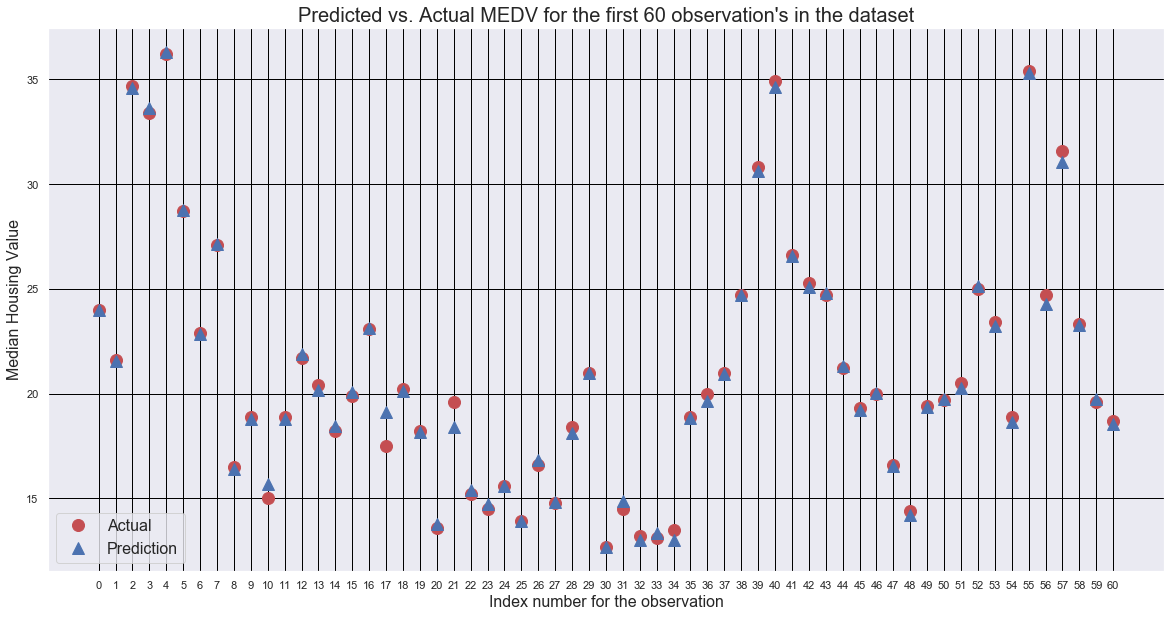

In [33]:
print('Plot 4')
# Adjust the loc slicer to return other observations, just remember to keep B_MEDV and P_MEDV the same
B_MEDV = output.loc[:60, 'MEDV'] 
P_MEDV = output.loc[:60, 'P_MEDV'] 

fig, ax = plt.subplots()
ax.plot(B_MEDV, color='r', marker='o', markersize=12, linestyle='', label="Actual")
ax.plot(P_MEDV, color='b', marker='^', markersize=12, linestyle='', label="Prediction")
ax.grid(color='black', linestyle='-', linewidth=1)
plt.xlabel("Index number for the observation", fontsize=16)
plt.ylabel("Median Housing Value", fontsize=16)
plt.title("Predicted vs. Actual MEDV for the first 60 observation's in the dataset", fontsize=20)
plt.legend(loc="best", fontsize=16)
plt.xticks(np.arange(0, 61, step=1))
plt.savefig("chart.jpg")
plt.show()

In [34]:
# Create a new column in the dataframe that is the difference between the Actual and Preducted values
output['DIFF'] = output['MEDV'] - output['P_MEDV']

Plot 5


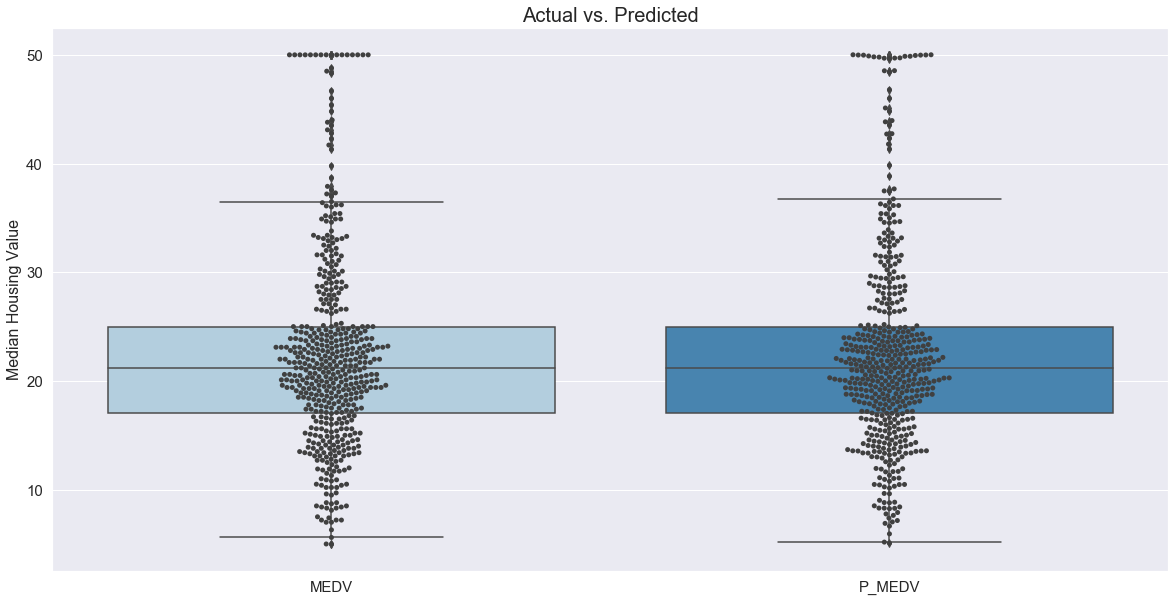

In [35]:
# Using a BoxPlot and SwarmPlot we can compare the shapes of the actual and predicted values. They are similar but not 
# exactly the same
print('Plot 5')
data = pd.DataFrame(data=output, columns=['MEDV', 'P_MEDV'])
ax = sns.boxplot(x="variable", y="value", data=pd.melt(data), palette="Blues")
ax.axes.set_title("Actual vs. Predicted",fontsize=20)
ax.tick_params(labelsize=15)
ax = sns.swarmplot(x="variable", y="value", data=pd.melt(data), color=".25")
ax.set_xlabel("",fontsize=16)
ax.set_ylabel("Median Housing Value",fontsize=16)
plt.show()

In [36]:
# Calculate the interquartile range for the differences between actual and predicted values
from scipy.stats import iqr
iqr(output['DIFF'], axis=0)

0.27031850814819336

In [37]:
# Display the predictive statistics for the difference between actual and predicted values to judge how much the model
# undervalues or overvalue housing
output['DIFF'].describe().round(2)

count    506.00
mean       0.03
std        0.27
min       -1.61
25%       -0.10
50%        0.02
75%        0.17
max        1.19
Name: DIFF, dtype: float64